<!--Header-->
<div>
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
            <img src="http://materials.cv.uoc.edu/cdocent/common/img/logo-uoc.png" alt="Logo UOC" class="img-responsive" style="margin:20px 0px 0px">
        </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 40px;">Combinació de classificadors: Random forests</h1>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #FCB517;padding: 10px 20px;">
        <div class="col-md-6">
            <div>PID_00233252</div>
        </div>
        <div class="col-md-6">
            <div style="text-align:right;">Autor: Xavier Duran Albareda <span style="margin-left: 30px;">Coordinació: Julià Minguillón</span></div>
        </div>
    </div>
</div>
<!--/Header-->

## Introducció

En aquest exemple, adaptat del llibre [Minería de datos, algoritmos y modelos](http://oer.uoc.edu/libroMD/), es mostra com generar un classificador arbre de decisió i com millorar-lo amb la tècnica de [Random forests](https://en.wikipedia.org/wiki/Random_forest).

Les dades analitzades corresponen al _dataset_ [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).

### Instal·lar els paquets necessaris en cas de no tenir-los

In [1]:
if(!require(rpart)){
    install.packages('rpart',repos='http://cran.es.r-project.org')
    require(rpart)
}
if(!require(caret)){
    install.packages('caret',repos='http://cran.es.r-project.org')
    require(caret)
}
if(!require(randomForest)){
    install.packages('caret',repos='http://cran.es.r-project.org')
    require(caret)
}
set.seed(17)

Loading required package: rpart
Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2
Loading required package: randomForest
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



### Càrrega de les dades

In [2]:
wdbc=read.table(
    url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"),
    sep=",",
    header=FALSE
)
dim(wdbc)
dataset <- wdbc[,(2:32)]

[1] 569  32

### Paràmetres de creació del model

Utilitzarem la mètrica _Accuracy_ que mesura el percentatge d'instàncies correctes sobre el total. Farem la validació creuada o _crossvalidation_ amb 10 _folds_.

In [3]:
control <- trainControl(method="repeatedcv", number=10, repeats=3, savePredictions = TRUE)
metric <- "Accuracy"

### Creem un primer model d'arbre

In [4]:
model.cart<-train(V2~.,data=dataset,method="rpart", metric=metric,trControl=control)

### Matriu de confusió

In [5]:
confusionMatrix(model.cart)

Cross-Validated (10 fold, repeated 3 times) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction    B    M
         B 58.6  4.2
         M  4.2 33.0
                            
 Accuracy (average) : 0.9162


###  Mostrem les característiques del model

CART 

569 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 512, 512, 512, 512, 512, 512, ... 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa    
  0.004716981  0.9162129  0.8206120
  0.049528302  0.9138118  0.8156747
  0.792452830  0.7526687  0.3742095

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.004716981.


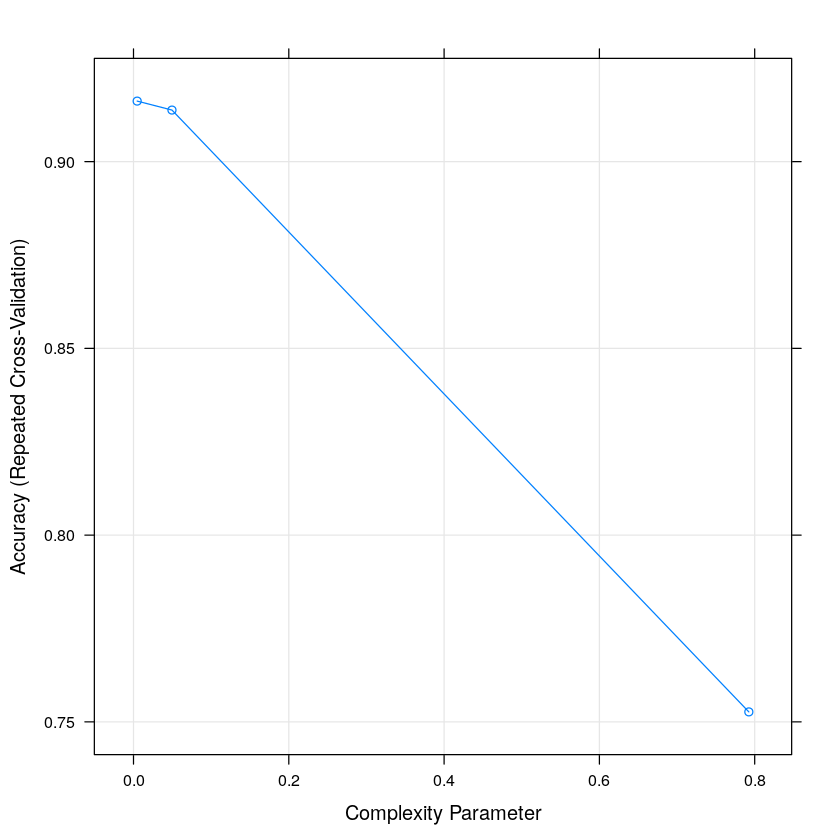

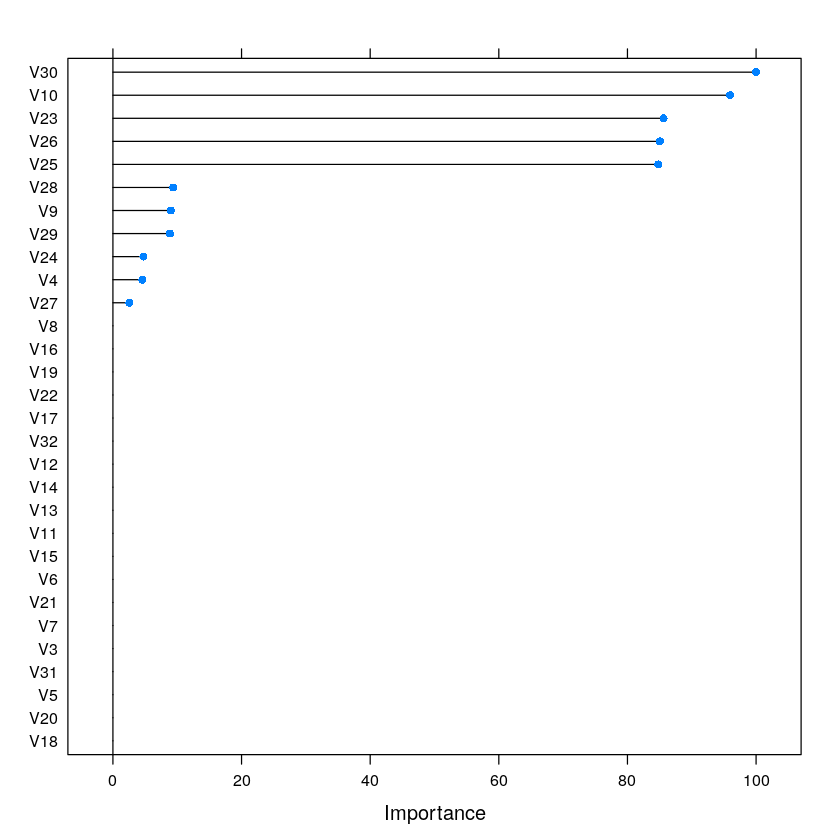

In [6]:
print(model.cart)
plot(model.cart)
ctreeVarImp = varImp(model.cart)
plot(ctreeVarImp)

### Creem un arbre amb el mètode Random Forest

In [7]:
 model.rf <- train(V2~., data=dataset, method="rf",metric=metric, trControl=control)

### Matriu de confusió

In [8]:
confusionMatrix(model.rf)

Cross-Validated (10 fold, repeated 3 times) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction    B    M
         B 61.5  2.3
         M  1.3 34.9
                            
 Accuracy (average) : 0.9637


###  Mostrem les característiques del model

In [9]:
print(model.rf)

Random Forest 

569 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 512, 512, 512, 512, 513, 512, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9601576  0.9138413
  16    0.9636465  0.9213230
  30    0.9606912  0.9148858

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 16.


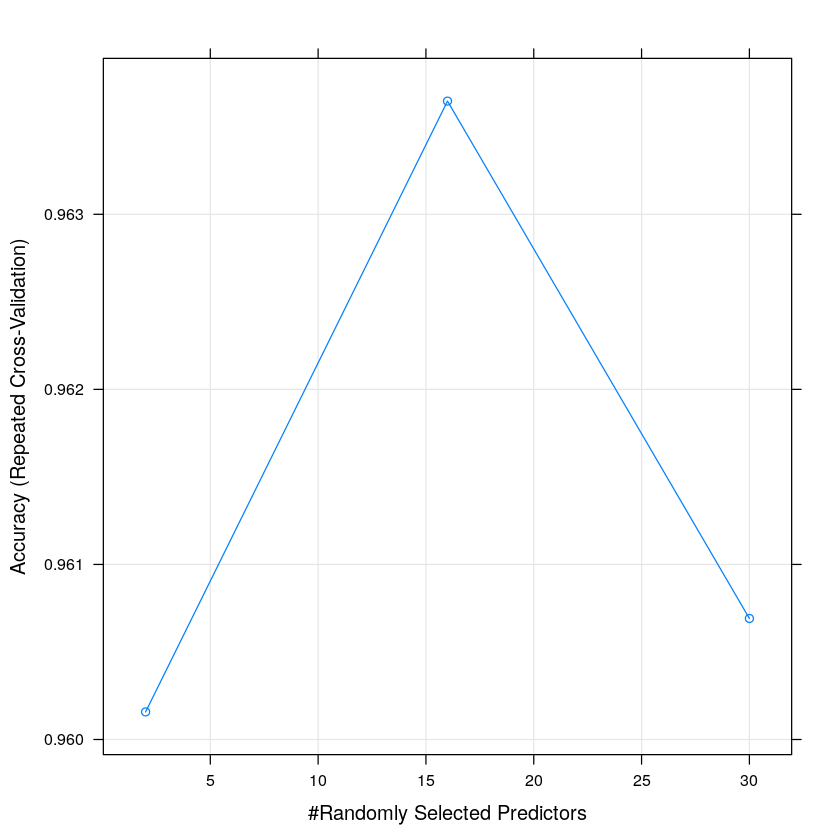

In [10]:
plot(model.rf)

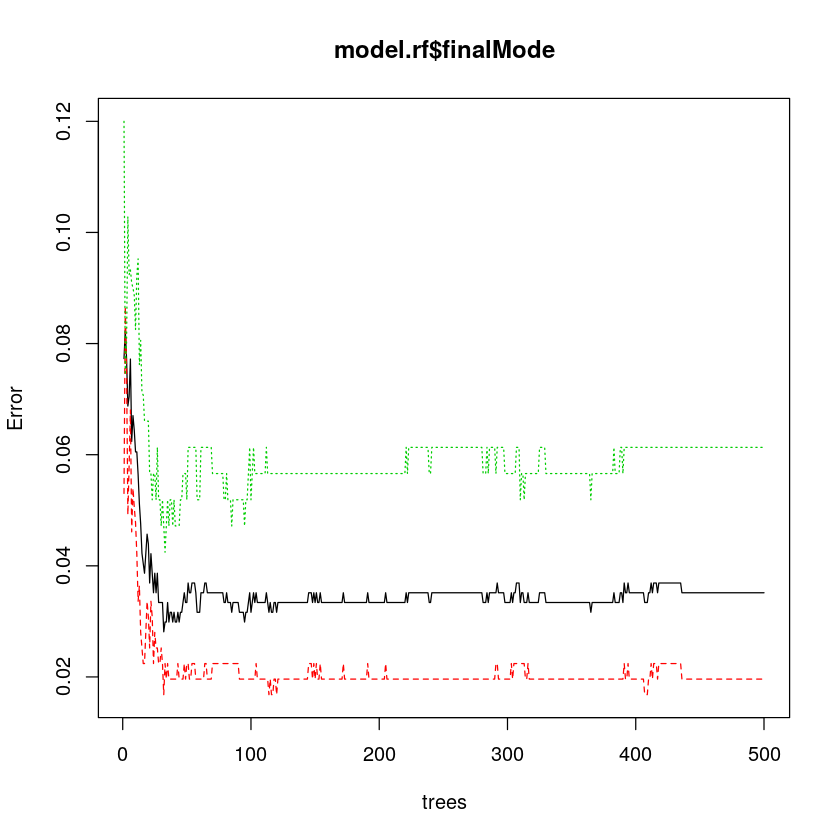

In [11]:
plot(model.rf$finalMode)

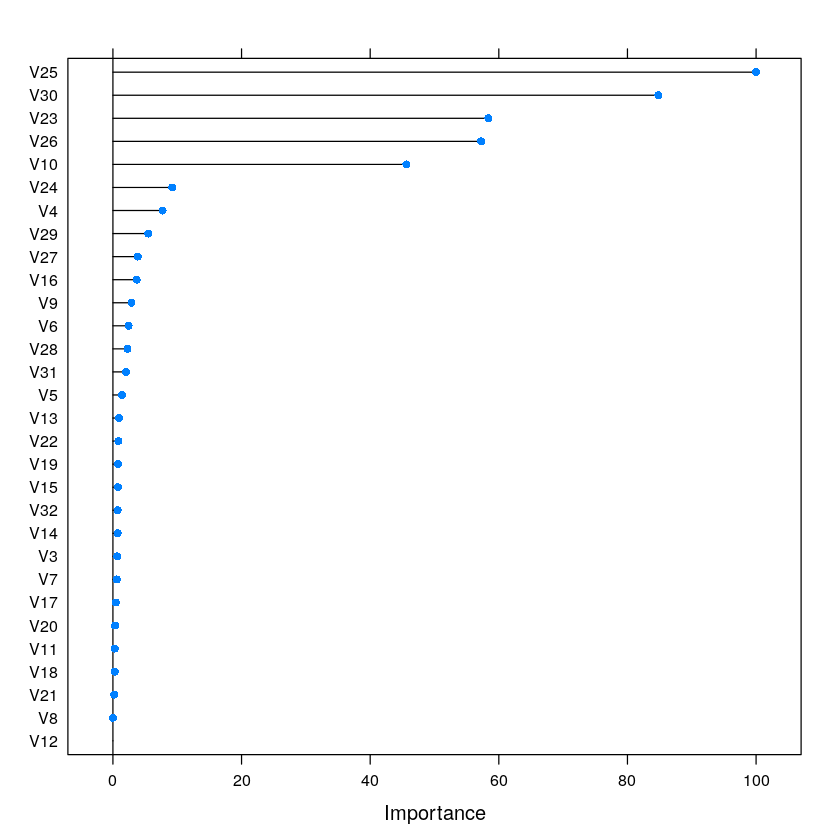

In [12]:
ctreeVarImp = varImp(model.rf)
plot(ctreeVarImp)

### Sumaritzem i comparem els dos models

In [13]:
rf_results <- resamples(list(rf=model.rf, cart=model.cart))
summary(rf_results)


Call:
summary.resamples(object = rf_results)

Models: rf, cart 
Number of resamples: 30 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
rf   0.9122807 0.9473684 0.9649123 0.9636465 0.9824561 1.0000000    0
cart 0.8392857 0.8811090 0.9130369 0.9162129 0.9471335 0.9824561    0

Kappa 
          Min.   1st Qu.    Median     Mean   3rd Qu.      Max. NA's
rf   0.8057260 0.8863326 0.9238400 0.921323 0.9622642 1.0000000    0
cart 0.6538462 0.7406943 0.8186858 0.820612 0.8865372 0.9626719    0


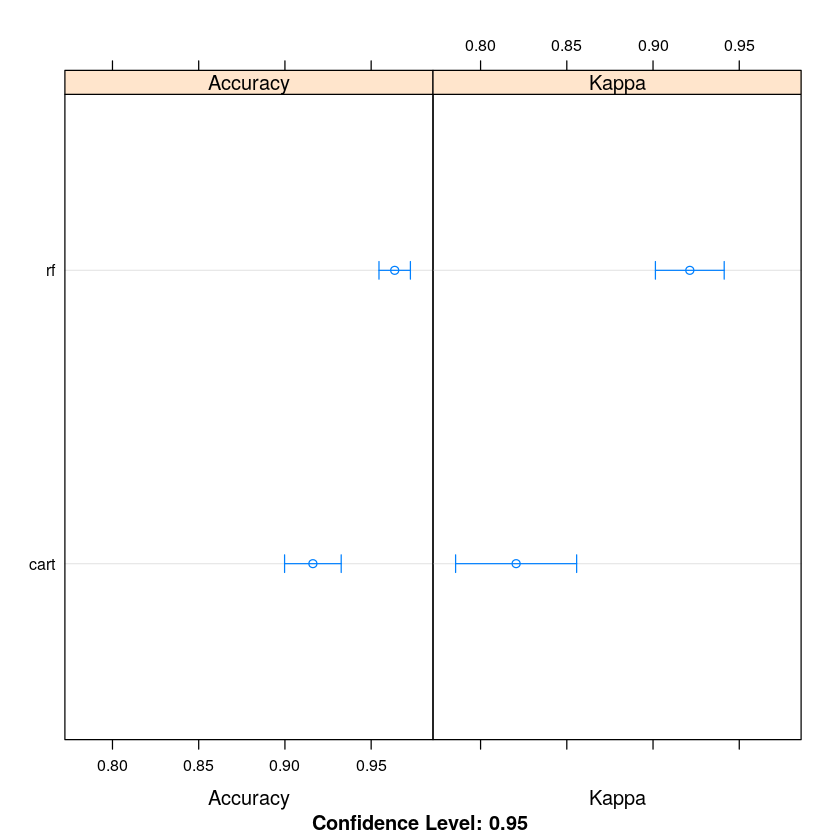

In [14]:
dotplot(rf_results)

<!--Footer-->
 <div style="background: #333333;padding: 35px 0px;margin-top: 25px;">
    <div class="row">
     <div class="col-sm-12">
        <img src="http://materials.cv.uoc.edu/cdocent/common/img/logo-uoc-bottom.png" alt="Logo UOC" class="img-responsive" style="margin: 0 auto; display: block;">
    </div>
</div>
</div>
<!--/Footer-->